## Iris Dataset - kNN Classification

By: Renaud Justin Beaupre

Using the Iris dataset, we're going to train up the kNN (k-Nearest Neighbors) algorithm to distinguish different flower species from one another.

We will be walking through a simple set up of the kNN classification algorithm before moving on to generate multiple different datasets with varying value of k (neighbors) before evaluating its performance using cross-validation.

The dataset as well as a data dictionary can be found here:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = pd.read_csv('iris.data.csv', sep=',', header=0, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])

iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.isnull().values.any()

False

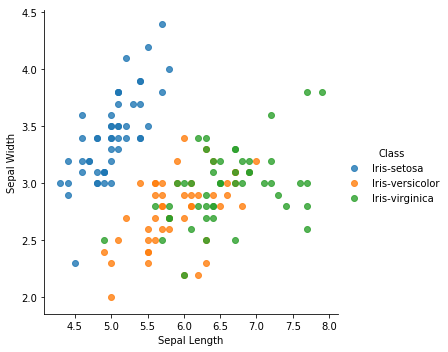

In [7]:
sepal = iris[['Sepal Length', 'Sepal Width', 'Class']].copy()

sepal_scatter = sns.lmplot(x='Sepal Length', y='Sepal Width', hue='Class', data=sepal, fit_reg=False);

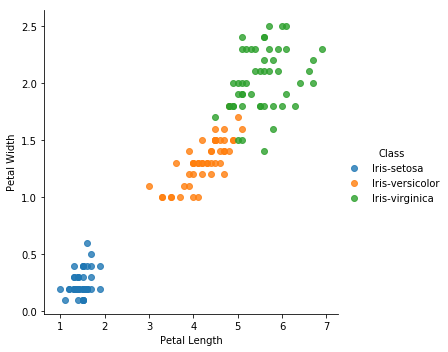

In [8]:
petal = iris[['Petal Length', 'Petal Width', 'Class']].copy()

petal_scatter = sns.lmplot(x='Petal Length', y='Petal Width', hue='Class', data=petal, fit_reg=False);

In [9]:
iris['Class'].replace('Iris-setosa', 0, inplace=True)
iris['Class'].replace('Iris-versicolor', 1, inplace=True)
iris['Class'].replace('Iris-virginica', 2, inplace=True)

In [10]:
X = iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].values
y = iris[['Class']].values.ravel()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train, y_train);

In [14]:
y_pred = knn.predict(X_test)

In [15]:
print(accuracy_score(y_test, y_pred)*100)

96.66666666666667


In [16]:
np.count_nonzero(y_test==y_pred) #29 correct predictions

29

In [17]:
np.count_nonzero(y_test!=y_pred) #... And 1 incorrect prediction

1

In [25]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Changing the arguments for train_test_split here for the following function

k_neighbors = [1, 3, 5, 7, 10, 20, 30, 40, 50]
avg_scores = []

for k in k_neighbors:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_k, X_train, y_train, cv=10)
    avg_scores.append(scores.mean()*100)

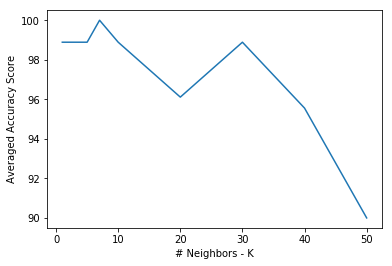

In [26]:
plt.plot(k_neighbors, avg_scores)
plt.xlabel('# Neighbors - K')
plt.ylabel('Averaged Accuracy Score')
plt.show()

In [20]:
print(avg_scores) #Typically we see high accuracy scores in the 0-10 neighbor range and then slopes down. The optimal number of neighbors will fluctuate as the dataset is random.

[95.77777777777777, 94.94444444444446, 96.77777777777777, 96.77777777777779, 95.86868686868686, 94.86868686868688, 93.2020202020202, 91.45959595959596, 89.43939393939395]
